In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import dependencies
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
%matplotlib notebook
from scipy.stats import norm
import seaborn as sns
#pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib


In [3]:
#Read CSV
Youtube_Data = pd.read_csv('../Files/US_youtube_trending_data.csv')

# Convert CSV to Data Frame
Youtube_Data = pd.DataFrame(Youtube_Data)

# preview Data Frame
Youtube_Data.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [4]:
# Preview last 5 rows of Data Frame
Youtube_Data.tail()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
143385,1GOzQD9H9bo,Drought Discoveries: Father-son duo document f...,2022-07-19T13:17:03Z,UCpR_4YnLJAphcr0VI5yR5SA,FOX5 Las Vegas,25,2022-07-25T00:00:00Z,KVVU|Fox5|Fox5Vegas|Las Vegas|Vegas,414168,3509,0,672,https://i.ytimg.com/vi/1GOzQD9H9bo/default.jpg,False,False,DROUGHT DISCOVERIES: A father-son duo has been...
143386,zrLxSgh5YxU,Funeral held for Ivana Trump,2022-07-20T21:36:49Z,UCIjSUWHWp6KohfnR5OQTXnQ,FOX 5 New York,25,2022-07-25T00:00:00Z,ivana trump funeral|ivana trump dies|ivana tru...,728579,6243,0,875,https://i.ytimg.com/vi/zrLxSgh5YxU/default.jpg,False,False,"Former President Donald Trump, all his childre..."
143387,avi9iBC8opU,'Which Uses More Electricity...A Refrigerator ...,2022-07-19T17:00:01Z,UCg40OxZ1GYh3u3jBntB6DLg,Forbes Breaking News,25,2022-07-25T00:00:00Z,Rep. Thomas Massie|Sec. Pete Buttigieg|House,924917,19340,0,9553,https://i.ytimg.com/vi/avi9iBC8opU/default.jpg,False,False,At today's House Transportation Committee hear...
143388,4tYuIU7pLmI,JACK - J97 | NGÔI SAO CÔ ĐƠN | OFFICIAL MUSIC ...,2022-07-19T13:09:08Z,UChUJa1JyBc7Lc4orkiNKKQg,J97,10,2022-07-25T00:00:00Z,J97|jack|phương tuấn|jack phương tuấn|j 97|jac...,13706188,694419,0,207765,https://i.ytimg.com/vi/4tYuIU7pLmI/default.jpg,False,False,JACK - J97 | NGÔI SAO CÔ ĐƠN | OFFICIAL MUSIC ...
143389,YB-zx_P_51I,Better Call Saul Season 6 Episode 9 Breakdown ...,2022-07-19T16:24:02Z,UC8zAiZUuUXe-touFVopBbZw,Pete Peppers,24,2022-07-25T00:00:00Z,better call saul|better call saul season 6 epi...,323192,9936,0,2345,https://i.ytimg.com/vi/YB-zx_P_51I/default.jpg,False,False,Better Call Saul Season 6 Episode 9 Breakdown ...


In [5]:
Youtube_Data.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description'],
      dtype='object')

In [6]:
# Observe Data Types
Youtube_Data.dtypes

video_id             object
title                object
publishedAt          object
channelId            object
channelTitle         object
categoryId            int64
trending_date        object
tags                 object
view_count            int64
likes                 int64
dislikes              int64
comment_count         int64
thumbnail_link       object
comments_disabled      bool
ratings_disabled       bool
description          object
dtype: object

In [7]:
# Number of Records in data
len(Youtube_Data)

143390

In [8]:
print ("Rows     : " , Youtube_Data.shape[0]) #Displays numbers of rows .
print ("Columns  : " , Youtube_Data.shape[1]) # and column our dataset contains.
print ("\nFeatures : \n", Youtube_Data.columns.tolist())#displays column names
print ("\nMissing values :  ", Youtube_Data.isnull().sum().values.sum())   #find missing values
print ("\nUnique values :  \n", Youtube_Data.nunique())  # Count distinct observations

Rows     :  143390
Columns  :  16

Features : 
 ['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle', 'categoryId', 'trending_date', 'tags', 'view_count', 'likes', 'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'description']

Missing values :   3663

Unique values :  
 video_id              26273
title                 26896
publishedAt           25881
channelId              6065
channelTitle           6175
categoryId               15
trending_date           697
tags                  19117
view_count           139730
likes                 98006
dislikes              13179
comment_count         28951
thumbnail_link        26273
comments_disabled         2
ratings_disabled          2
description           26843
dtype: int64


In [9]:
# finding number of null records for each column
Youtube_Data.isna().sum()

video_id                0
title                   0
publishedAt             0
channelId               0
channelTitle            0
categoryId              0
trending_date           0
tags                    0
view_count              0
likes                   0
dislikes                0
comment_count           0
thumbnail_link          0
comments_disabled       0
ratings_disabled        0
description          3663
dtype: int64

In [10]:
# Dropping unecessary columns
Youtube_Data = Youtube_Data.drop(columns=['thumbnail_link','comments_disabled','ratings_disabled','description'])

In [11]:
# Renaming columns
Youtube_Data = Youtube_Data.rename(columns={'likes':'Likes','dislikes':'Dislikes',
                                            'channelTitle':'Channel Title','comment_count':'Comments','channelTitle':'Channel Title',
                                           'video_id':'Video ID','channelId':'Channel ID'})

In [12]:
Youtube_Data.head()

,Video ID,title,publishedAt,Channel ID,Channel Title,categoryId,trending_date,tags,view_count,Likes,Dislikes,Comments
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196


In [13]:
# add new column that would contain latest view_count for the particular video.
#since number of views keep on increasing everyday , we will be using only single observation against a video id.
Youtube_Data['count_max_view'] = Youtube_Data.groupby(['Video ID'])['view_count'].transform(max)

In [14]:
# Renaming Data Frame 
Youtube_Unique_Video_Id = Youtube_Data

In [15]:
#changing published date , trending_date to datetime datatype.
Youtube_Unique_Video_Id.publishedAt= pd.to_datetime(Youtube_Unique_Video_Id.publishedAt)
Youtube_Unique_Video_Id.trending_date= pd.to_datetime(Youtube_Unique_Video_Id.trending_date).values.astype(float)


Youtube_Unique_Video_Id

,Video ID,title,publishedAt,Channel ID,Channel Title,categoryId,trending_date,tags,view_count,Likes,Dislikes,Comments,count_max_view
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,1.597190e+18,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,3958226
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,1.597190e+18,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,3482753
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,1.597190e+18,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,3490530
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,UCbg_UMjlHJg_19SZckaKajg,XXL,10,1.597190e+18,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,1212499
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,1.597190e+18,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,2400821
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143385,1GOzQD9H9bo,Drought Discoveries: Father-son duo document f...,2022-07-19 13:17:03+00:00,UCpR_4YnLJAphcr0VI5yR5SA,FOX5 Las Vegas,25,1.658707e+18,KVVU|Fox5|Fox5Vegas|Las Vegas|Vegas,414168,3509,0,672,414168
143386,zrLxSgh5YxU,Funeral held for Ivana Trump,2022-07-20 21:36:49+00:00,UCIjSUWHWp6KohfnR5OQTXnQ,FOX 5 New York,25,1.658707e+18,ivana trump funeral|ivana trump dies|ivana tru...,728579,6243,0,875,728579
143387,avi9iBC8opU,'Which Uses More Electricity...A Refrigerator ...,2022-07-19 17:00:01+00:00,UCg40OxZ1GYh3u3jBntB6DLg,Forbes Breaking News,25,1.658707e+18,Rep. Thomas Massie|Sec. Pete Buttigieg|House,924917,19340,0,9553,924917
143388,4tYuIU7pLmI,JACK - J97 | NGÔI SAO CÔ ĐƠN | OFFICIAL MUSIC ...,2022-07-19 13:09:08+00:00,UChUJa1JyBc7Lc4orkiNKKQg,J97,10,1.658707e+18,J97|jack|phương tuấn|jack phương tuấn|j 97|jac...,13706188,694419,0,207765,13706188


In [16]:
#Adding column for year and month to the dataframe
Youtube_Unique_Video_Id['Year']=Youtube_Unique_Video_Id['publishedAt'].dt.year
Youtube_Unique_Video_Id['Month']=Youtube_Unique_Video_Id['publishedAt'].dt.month

In [17]:
# make a new dataframe with only single observations for each id.
Youtube_Unique_Video_Id = Youtube_Data.loc[Youtube_Data.view_count == Youtube_Data.count_max_view]
# Youtube_Unique_Video_Id.loc[Youtube_Unique_Video_Id.Year == 2021, 'title'].count()

In [18]:
# Use Youtube_Unique_Video_Id for main dataset

In [19]:
# Number of unique records in each column
Youtube_Unique_Video_Id.nunique()

Video ID          26273
title             26144
publishedAt       25881
Channel ID         6062
Channel Title      6156
categoryId           15
trending_date       697
tags              18774
view_count        26156
Likes             24122
Dislikes           5614
Comments          12009
count_max_view    26156
Year                  3
Month                12
dtype: int64

In [20]:
Youtube_Unique_Video_Id.duplicated(subset=['Video ID'])

172       False
173       False
174       False
175       False
176       False
          ...  
143385    False
143386    False
143387    False
143388    False
143389    False
Length: 26360, dtype: bool

In [21]:
Reocurring_Trending_Videos = Youtube_Unique_Video_Id.groupby(['Video ID']).count().sort_values(by='title',ascending=False)
Reocurring_Trending_Videos.head(10)

,title,publishedAt,Channel ID,Channel Title,categoryId,trending_date,tags,view_count,Likes,Dislikes,Comments,count_max_view,Year,Month
Video ID,,,,,,,,,,,,,,
69KrkMpvZdg,8,8,8,8,8,8,8,8,8,8,8,8,8,8
hAxqygRdM4g,7,7,7,7,7,7,7,7,7,7,7,7,7,7
AWXvClaRtsI,7,7,7,7,7,7,7,7,7,7,7,7,7,7
ZoPJVcHYlU0,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Isim0ysZ6X4,5,5,5,5,5,5,5,5,5,5,5,5,5,5
ifJYb2An7wE,5,5,5,5,5,5,5,5,5,5,5,5,5,5
BxOEj8ZeX2g,5,5,5,5,5,5,5,5,5,5,5,5,5,5
kmk5vciFbek,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Hb3rmh-_FMw,4,4,4,4,4,4,4,4,4,4,4,4,4,4


In [22]:
Youtube_Unique_Video_Id.columns

Index(['Video ID', 'title', 'publishedAt', 'Channel ID', 'Channel Title',
       'categoryId', 'trending_date', 'tags', 'view_count', 'Likes',
       'Dislikes', 'Comments', 'count_max_view', 'Year', 'Month'],
      dtype='object')

In [23]:
len(Youtube_Unique_Video_Id)

26360

In [24]:
#filter for rows with a view count >0
# First filter out those rows which
# does not contain any data
#Youtube_Unique_Video_Id = Youtube_Unique_Video_Id.dropna(how = 'all')
  
# Filter all rows for which the player's
# age is greater than or equal to 25
Youtube_Unique_Video_Id.drop(Youtube_Unique_Video_Id[Youtube_Unique_Video_Id['view_count'] == 0].index, inplace = True)
  

# Youtube_Unique_Video_Id = Youtube_Unique_Video_Id[Youtube_Unique_Video_Id['view_count'] >= 0]
Youtube_Unique_Video_Id.head()

,Video ID,title,publishedAt,Channel ID,Channel Title,categoryId,trending_date,tags,view_count,Likes,Dislikes,Comments,count_max_view,Year,Month
172,cAtazIk1IYw,How To Make a Curried Egg Sandwich,2020-08-07 18:30:06+00:00,UCR4s1DE9J4DHzZYXMltSMAg,HowToBasic,26,1.597190e+18,how to make a curried egg sandwich|curried egg...,1238677,104736,3736,13876,1238677,2020,8
173,NYFHnIiA8gE,Cake Rescue Fixing Viral Cake Fails | How To C...,2020-08-07 09:30:04+00:00,UCsP7Bpw36J666Fct5M8u-ZA,How To Cook That,24,1.597190e+18,cake rescue|caek fail|viral cake fails|funny c...,938198,44088,565,2409,938198,2020,8
174,czwejgoH3zs,"Son, lemme teach you something new",2020-08-06 19:47:12+00:00,UCw03U5DZGLqvv5elJvXvR0Q,Bread Boys,24,1.597190e+18,[None],1722152,169501,927,7263,1722152,2020,8
175,dO6YihaqtaQ,Trump takes executive action to address econom...,2020-08-09 01:35:42+00:00,UCBi2mrWuNuyYy4gbM6fU18Q,ABC News,25,1.597190e+18,president|trump|donald|executive|orders|stimul...,1090847,10922,2517,9876,1090847,2020,8
176,sSjtGqRXQ9Y,JUDAS AND THE BLACK MESSIAH - Official Trailer,2020-08-06 23:01:42+00:00,UCjmJDM5pRKbUlVIzDYYWb6g,Warner Bros. Pictures,24,1.597190e+18,warner bros|warner brothers|wb|fred hampton|wi...,971704,23311,1987,3240,971704,2020,8


In [25]:
len(Youtube_Unique_Video_Id)

26302

In [26]:
# display data frame first five rows
Youtube_Unique_Video_Id.head()

,Video ID,title,publishedAt,Channel ID,Channel Title,categoryId,trending_date,tags,view_count,Likes,Dislikes,Comments,count_max_view,Year,Month
172,cAtazIk1IYw,How To Make a Curried Egg Sandwich,2020-08-07 18:30:06+00:00,UCR4s1DE9J4DHzZYXMltSMAg,HowToBasic,26,1.597190e+18,how to make a curried egg sandwich|curried egg...,1238677,104736,3736,13876,1238677,2020,8
173,NYFHnIiA8gE,Cake Rescue Fixing Viral Cake Fails | How To C...,2020-08-07 09:30:04+00:00,UCsP7Bpw36J666Fct5M8u-ZA,How To Cook That,24,1.597190e+18,cake rescue|caek fail|viral cake fails|funny c...,938198,44088,565,2409,938198,2020,8
174,czwejgoH3zs,"Son, lemme teach you something new",2020-08-06 19:47:12+00:00,UCw03U5DZGLqvv5elJvXvR0Q,Bread Boys,24,1.597190e+18,[None],1722152,169501,927,7263,1722152,2020,8
175,dO6YihaqtaQ,Trump takes executive action to address econom...,2020-08-09 01:35:42+00:00,UCBi2mrWuNuyYy4gbM6fU18Q,ABC News,25,1.597190e+18,president|trump|donald|executive|orders|stimul...,1090847,10922,2517,9876,1090847,2020,8
176,sSjtGqRXQ9Y,JUDAS AND THE BLACK MESSIAH - Official Trailer,2020-08-06 23:01:42+00:00,UCjmJDM5pRKbUlVIzDYYWb6g,Warner Bros. Pictures,24,1.597190e+18,warner bros|warner brothers|wb|fred hampton|wi...,971704,23311,1987,3240,971704,2020,8


In [27]:
# Basic Statistics for Data Frame
Youtube_Unique_Video_Id.describe().applymap('{:,.2f}'.format)

,categoryId,trending_date,view_count,Likes,Dislikes,Comments,count_max_view,Year,Month
count,"26,302.00","26,302.00","26,302.00","26,302.00","26,302.00","26,302.00","26,302.00","26,302.00","26,302.00"
mean,18.88,"1,629,141,958,968,905,984.00","2,774,852.95","138,156.50","2,131.58","10,808.87","2,774,852.95","2,021.10",6.58
std,6.70,"17,964,248,639,706,210.00","6,765,612.54","392,951.48","11,055.48","83,750.52","6,765,612.54",0.70,3.44
min,1.00,"1,597,190,400,000,000,000.00","43,472.00",0.00,0.00,0.00,"43,472.00","2,020.00",1.00
25%,17.00,"1,613,865,600,000,000,000.00","575,759.00","20,492.00",0.00,"1,413.00","575,759.00","2,021.00",4.00
50%,20.00,"1,630,454,400,000,000,000.00","1,175,020.50","49,234.00",396.00,"3,170.00","1,175,020.50","2,021.00",7.00
75%,24.00,"1,644,278,400,000,000,000.00","2,574,117.00","124,128.50","1,386.00","7,393.00","2,574,117.00","2,022.00",10.00
max,29.00,"1,658,707,200,000,000,000.00","264,407,389.00","16,021,534.00","879,354.00","6,738,537.00","264,407,389.00","2,022.00",12.00


In [28]:
# gives us various count of video in each channel category
Youtube_Unique_Video_Id.groupby("categoryId").size().reset_index(name="View Count") \
    .sort_values("View Count", ascending=False).head(20)

,categoryId,View Count
9,24,5218
6,20,5016
2,10,4250
4,17,3094
7,22,2381
8,23,1410
10,25,1021
0,1,1002
13,28,828
11,26,759


In [31]:
#Getting category for the category file
#we need id and title from this file which are under items tag and snippet contain title
with open("../Files/US_category_id.json") as f:
    categories = json.load(f)["items"]
cat_dict = {}
category=[]
for cat in categories:
    category.append([cat["id"],cat["snippet"]["title"]])

In [32]:
df_category = pd.DataFrame(category,columns=['categoryId','category']) 
df_category.head(20)

,categoryId,category
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [33]:
df_category.categoryId=df_category.categoryId.astype('int64')
#merge YT Data Frame and df_category to get category names
df_merge = Youtube_Unique_Video_Id.merge(df_category, on = 'categoryId', how = 'inner')
df_merge.head()

,Video ID,title,publishedAt,Channel ID,Channel Title,categoryId,trending_date,tags,view_count,Likes,Dislikes,Comments,count_max_view,Year,Month,category
0,cAtazIk1IYw,How To Make a Curried Egg Sandwich,2020-08-07 18:30:06+00:00,UCR4s1DE9J4DHzZYXMltSMAg,HowToBasic,26,1.597190e+18,how to make a curried egg sandwich|curried egg...,1238677,104736,3736,13876,1238677,2020,8,Howto & Style
1,8r1D-vNUWsg,☁️ 🍞 CLOUD BREAD,2020-08-09 00:00:04+00:00,UCzqbfYjQmf9nLQPMxVgPhiA,emmymadeinjapan,26,1.597363e+18,cloud|bread|cloud bread|viral|trend|TikTok|mer...,993107,41182,650,3042,993107,2020,8,Howto & Style
2,XlOLx3fyf10,TESTING TIKTOK ART TUTORIALS,2020-08-08 20:00:03+00:00,UCD4XIm3ZFhT72WjqhIXMN9w,LavenderTowne,26,1.597363e+18,art|lavender|towne|lavendertowne|digital|photo...,407183,42644,347,2465,407183,2020,8,Howto & Style
3,KnE6u4hFx14,PAINTING OUR FACES ON BRENT'S NEW HOUSE! (REVE...,2020-08-08 20:45:05+00:00,UCPpATKqmMV-CNRNWYaDUwiA,Alexa Rivera,26,1.597450e+18,[None],4782509,207021,3637,8385,4782509,2020,8,Howto & Style
4,YwJyis4yOEA,ANSWERING YOUR ASSUMPTIONS ABOUT US 😭,2020-08-09 13:46:28+00:00,UC21yq4sq8uxTcfgIxxyE9VQ,Carli Bybel,26,1.597450e+18,carli|bybel|carlibel|boyfriend|ant tango|Antho...,350066,20393,379,1775,350066,2020,8,Howto & Style


In [34]:
likes_mean = np.mean(df_merge['Likes'])
views_mean = np.mean(df_merge['view_count'])
comments_mean = np.mean(df_merge['Comments'])
dislikes_mean = np.mean(df_merge['Dislikes'])

In [35]:
likes_sd = np.std(df_merge['Likes'],ddof = 0)
views_sd = np.std(df_merge['view_count'],ddof = 0)
comments_sd = np.std(df_merge['Comments'],ddof = 0)
dislikes_sd = np.std(df_merge['Dislikes'],ddof = 0)

In [36]:
df_merge.describe()

,categoryId,trending_date,view_count,Likes,Dislikes,Comments,count_max_view,Year,Month
count,26302.000000,2.630200e+04,2.630200e+04,2.630200e+04,26302.000000,2.630200e+04,2.630200e+04,26302.000000,26302.000000
mean,18.876435,1.629142e+18,2.774853e+06,1.381565e+05,2131.582845,1.080887e+04,2.774853e+06,2021.104593,6.582085
std,6.696238,1.796425e+16,6.765613e+06,3.929515e+05,11055.479226,8.375052e+04,6.765613e+06,0.703353,3.439750
min,1.000000,1.597190e+18,4.347200e+04,0.000000e+00,0.000000,0.000000e+00,4.347200e+04,2020.000000,1.000000
25%,17.000000,1.613866e+18,5.757590e+05,2.049200e+04,0.000000,1.413000e+03,5.757590e+05,2021.000000,4.000000
50%,20.000000,1.630454e+18,1.175020e+06,4.923400e+04,396.000000,3.170000e+03,1.175020e+06,2021.000000,7.000000
75%,24.000000,1.644278e+18,2.574117e+06,1.241285e+05,1386.000000,7.393000e+03,2.574117e+06,2022.000000,10.000000
max,29.000000,1.658707e+18,2.644074e+08,1.602153e+07,879354.000000,6.738537e+06,2.644074e+08,2022.000000,12.000000


The average likes are: 138156.495 and the std Dev is: 392944.007


<IPython.core.display.Javascript object>


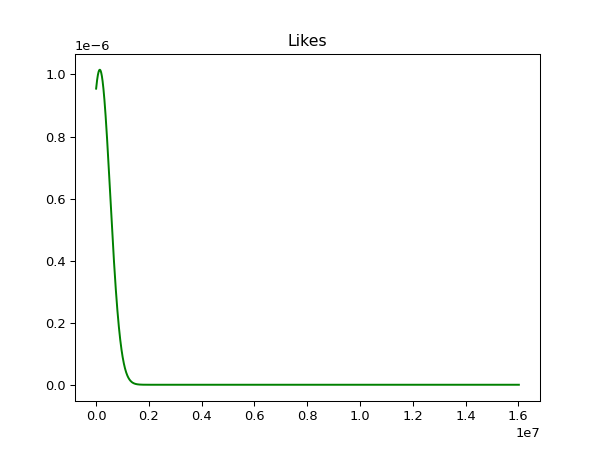

In [37]:
plt.close()
print(f"The average likes are: {round(likes_mean,3)} and the std Dev is: {round(likes_sd,3)}")
pdf_temp = norm.pdf(df_merge['Likes'].sort_values(), likes_mean, likes_sd)
plt.plot(df_merge['Likes'].sort_values(), pdf_temp, color = 'green')
plt.title("Likes")
plt.savefig("Likes_mean_std.png")
plt.show()

The average # of dislikes are: 2131.583 and the std Dev is: 11055.269


<IPython.core.display.Javascript object>


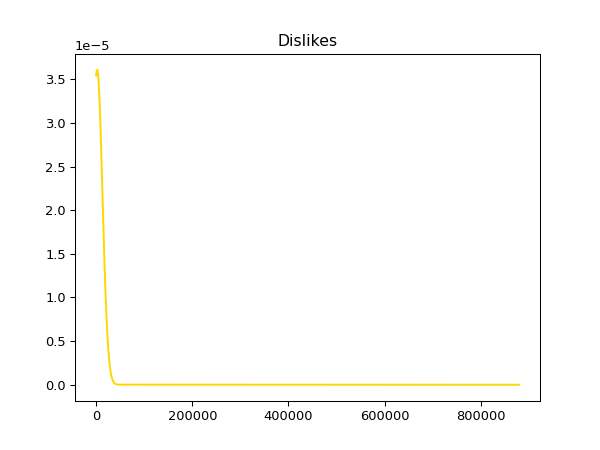

In [38]:
plt.close()
print(f"The average # of dislikes are: {round(dislikes_mean,3)} and the std Dev is: {round(dislikes_sd,3)}")
pdf_temp = norm.pdf(df_merge['Dislikes'].sort_values(ascending=False), dislikes_mean, dislikes_sd)
plt.plot(df_merge['Dislikes'].sort_values(ascending=False), pdf_temp, color = 'gold')
plt.title("Dislikes")
plt.savefig("Dislikes_mean_std.png")
plt.show()

The average # of views are: 2774852.95 and the std Dev is: 6765483.921


<IPython.core.display.Javascript object>


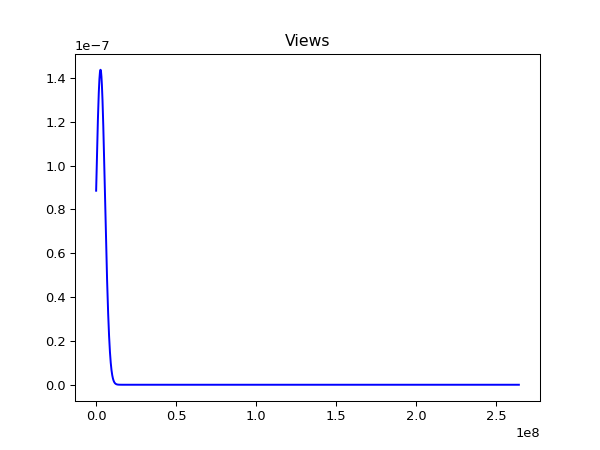

In [39]:
plt.close()
print(f"The average # of views are: {round(views_mean,3)} and the std Dev is: {round(views_sd,3)}")
pdf_temp = norm.pdf(df_merge['view_count'].sort_values(), views_mean, views_mean)
plt.plot(df_merge['view_count'].sort_values(), pdf_temp, color = 'blue')
plt.title("Views")
plt.savefig("views_mean_std.png")
plt.show()

The average # of comments are: 10808.872 and the std Dev is: 83748.924


<IPython.core.display.Javascript object>


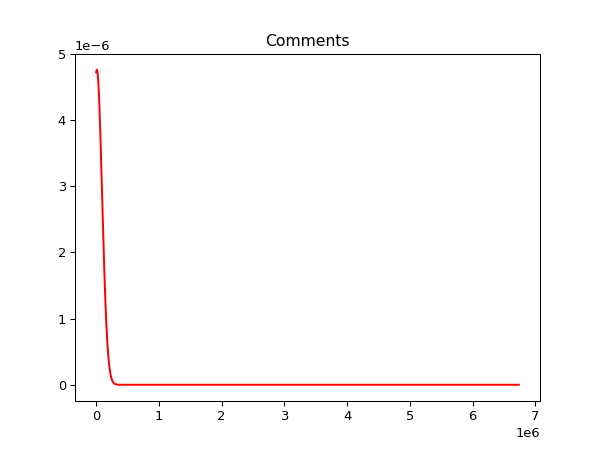

In [40]:
plt.close()
print(f"The average # of comments are: {round(comments_mean,3)} and the std Dev is: {round(comments_sd,3)}")
pdf_temp = norm.pdf(df_merge['Comments'].sort_values(), comments_mean, comments_sd)
plt.plot(df_merge['Comments'].sort_values(), pdf_temp, color = 'red')
plt.title("Comments")
plt.savefig("comments_mean_std.png")
plt.show()

In [41]:
quartiles = df_merge["Likes"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of likes is: {lowerq}")
print(f"The upper quartile of likes is: {upperq}")
print(f"The interquartile range of likes is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of likes is: 20492.0
The upper quartile of likes is: 124128.5
The interquartile range of likes is: 103636.5
Values below -134962.75 could be outliers.
Values above 279583.25 could be outliers.


In [42]:
quartiles = df_merge["view_count"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Views is: {lowerq}")
print(f"The upper quartile of Views is: {upperq}")
print(f"The interquartile range of Views is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Views is: 575759.0
The upper quartile of Views is: 2574117.0
The interquartile range of Views is: 1998358.0
Values below -2421778.0 could be outliers.
Values above 5571654.0 could be outliers.


In [43]:
quartiles = df_merge["Comments"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Comments is: {lowerq}")
print(f"The upper quartile of Comments is: {upperq}")
print(f"The interquartile range of Comments is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Comments is: 1413.0
The upper quartile of Comments is: 7393.0
The interquartile range of Comments is: 5980.0
Values below -7557.0 could be outliers.
Values above 16363.0 could be outliers.


In [44]:
quartiles = df_merge["Dislikes"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of likes is: {lowerq}")
print(f"The upper quartile of likes is: {upperq}")
print(f"The interquartile range of likes is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of likes is: 0.0
The upper quartile of likes is: 1386.0
The interquartile range of likes is: 1386.0
Values below -2079.0 could be outliers.
Values above 3465.0 could be outliers.


In [45]:
# Calculate the 68-95-99.7 rule using the standard deviation
print(f"Roughly 68% of the likes is between {round(likes_mean-likes_sd,3)} and {round(likes_mean+likes_sd,3)}")
print(f"Roughly 95% of the likes is between {round(likes_mean-2*likes_sd,3)} and {round(likes_mean+2*likes_sd,3)}")
print(f"Roughly 99.7% of the likes is between {round(likes_mean-3*likes_sd,3)} and {round(likes_mean+3*likes_sd,3)}")

Roughly 68% of the likes is between -254787.512 and 531100.502
Roughly 95% of the likes is between -647731.519 and 924044.509
Roughly 99.7% of the likes is between -1040675.526 and 1316988.516


In [46]:
# Calculate the 68-95-99.7 rule using the standard deviation
print(f"Roughly 68% of the views is between {round(views_mean-views_sd,3)} and {round(views_mean+views_sd,3)}")
print(f"Roughly 95% of the views is between {round(views_mean-2*views_sd,3)} and {round(views_mean+2*views_sd,3)}")
print(f"Roughly 99.7% of the views is between {round(views_mean-3*views_sd,3)} and {round(views_mean+3*views_sd,3)}")

Roughly 68% of the views is between -3990630.972 and 9540336.871
Roughly 95% of the views is between -10756114.893 and 16305820.793
Roughly 99.7% of the views is between -17521598.814 and 23071304.714


In [47]:
# Calculate the 68-95-99.7 rule using the standard deviation
print(f"Roughly 68% of the comments is between {round(comments_mean-comments_sd,3)} and {round(comments_mean+comments_sd,3)}")
print(f"Roughly 95% of the comments is between {round(comments_mean-2*comments_sd,3)} and {round(comments_mean+2*comments_sd,3)}")
print(f"Roughly 99.7% of the comments is between {round(comments_mean-3*comments_sd,3)} and {round(comments_mean+3*comments_sd,3)}")

Roughly 68% of the comments is between -72940.051 and 94557.796
Roughly 95% of the comments is between -156688.975 and 178306.72
Roughly 99.7% of the comments is between -240437.899 and 262055.643


In [48]:
# Calculate the 68-95-99.7 rule using the standard deviation
print(f"Roughly 68% of the dislikes is between {round(dislikes_mean-dislikes_sd,3)} and {round(dislikes_mean+dislikes_sd,3)}")
print(f"Roughly 95% of the dislikes is between {round(dislikes_mean-2*dislikes_sd,3)} and {round(dislikes_mean+2*dislikes_sd,3)}")
print(f"Roughly 99.7% of the dislikes is between {round(dislikes_mean-3*dislikes_sd,3)} and {round(dislikes_mean+3*dislikes_sd,3)}")

Roughly 68% of the dislikes is between -8923.686 and 13186.852
Roughly 95% of the dislikes is between -19978.955 and 24242.121
Roughly 99.7% of the dislikes is between -31034.224 and 35297.39


In [49]:
# Demonstrate calculating the z-scores using SciPy
likes_z_scipy = st.zscore(df_merge['Likes'])
print(f"The z-scores using the SciPy module are {likes_z_scipy}")

The z-scores using the SciPy module are 0       -0.085052
1       -0.246790
2       -0.243069
3        0.175253
4       -0.299695
           ...   
26297    1.316324
26298    0.486628
26299    0.731187
26300   -0.314043
26301   -0.170797
Name: Likes, Length: 26302, dtype: float64


In [50]:
like_p = st.norm.sf(abs(likes_z_scipy))
like_p
significant_list = []
alpha = 0.05
for p in range(len(like_p)):
    if like_p[p] < alpha:
        significant_list.append(like_p[p])

percent = ((len(significant_list))/(len(like_p)) * 100)
print(f"There is a {percent:.4f}% chance of having a video gain popularity")

There is a 2.6234% chance of having a video gain popularity


In [51]:
# Demonstrate calculating the z-scores using SciPy
views_z_scipy = st.zscore(df_merge['view_count'])
print(f"The z-scores using the SciPy module are {views_z_scipy}")

The z-scores using the SciPy module are 0       -0.227061
1       -0.263358
2       -0.349963
3        0.296750
4       -0.358406
           ...   
26297    0.234651
26298    0.063741
26299    0.146702
26300   -0.352825
26301    0.483411
Name: view_count, Length: 26302, dtype: float64


In [52]:
views_p = st.norm.sf(abs(views_z_scipy))
views_p
significant_list = []
alpha = 0.05
for p in range(len(views_p)):
    if views_p[p] <= alpha:
        significant_list.append(views_p[p])
        
percent = ((len(significant_list))/(len(views_p)) * 100)
print(f"There is a {percent:.4f}% chance of having a video gain popularity")

There is a 2.8553% chance of having a video gain popularity


In [53]:
# Demonstrate calculating the z-scores using SciPy
comment_z_scipy = st.zscore(df_merge['Comments'])
print(f"The z-scores using the SciPy module are {comment_z_scipy}")

The z-scores using the SciPy module are 0        0.036623
1       -0.092740
2       -0.099630
3       -0.028942
4       -0.107869
           ...   
26297    0.052563
26298   -0.129063
26299   -0.129063
26300   -0.110686
26301    0.103083
Name: Comments, Length: 26302, dtype: float64


In [54]:
comment_p = st.norm.sf(abs(comment_z_scipy))
comment_p
significant_list = []
alpha = 0.05
for p in range(len(comment_p)):
    if comment_p[p] <= alpha:
        significant_list.append(comment_p[p])
        
percent = ((len(significant_list))/(len(comment_p)) * 100)
print(f"There is a {percent:.4f}% chance of having a video gain popularity")

There is a 0.6768% chance of having a video gain popularity


In [55]:
# Demonstrate calculating the z-scores using SciPy
dislikes_z_scipy = st.zscore(df_merge['Dislikes'])
dislikes_z_scipy

0        0.145127
1       -0.134016
2       -0.161424
3        0.136172
4       -0.158529
           ...   
26297    0.003294
26298   -0.050798
26299   -0.057039
26300    0.002751
26301   -0.192811
Name: Dislikes, Length: 26302, dtype: float64

In [56]:
dislike_p = st.norm.sf(abs(dislikes_z_scipy))
dislike_p
significant_list = []
alpha = 0.05
for p in range(len(dislike_p)):
    if dislike_p[p] <= alpha:
        significant_list.append(dislike_p[p])
        
percent = ((len(significant_list))/(len(dislike_p)) * 100)
print(f"There is a {percent:.4f}% chance of having a video gain popularity")

There is a 1.6957% chance of having a video gain popularity
